<a href="https://colab.research.google.com/github/LaurenVaught/CompanyBankruptcyPrediction/blob/main/Company_Bankrupt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ingest

In [33]:
import numpy as np
from numpy import arange
import pandas as pd
import os
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error

import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
#from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
import xgboost as xg
#from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [41]:
# IMPORTING LIBRARIES

# General Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

# Preprocessing Libraries

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Machine Learning Libraries

import sklearn
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
#from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
#from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [2]:
#upload from raw link on github
df = pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/CompanyBankruptcyPrediction/main/data.csv') 

##EDA

###Introduction

Oftentimes when a company files for bankruptcy, there may have been a warning sign along the way. In the Company Bankruptcy Prediction dataset, provided by Kaggle, tese data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. I would expect that total debt ratio to be predictive of a company that is struggling to run in the black.

In [3]:
df.shape

(6819, 96)

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [5]:
df.info

<bound method DataFrame.info of       Bankrupt?  ...   Equity to Liability
0             1  ...              0.016469
1             1  ...              0.020794
2             1  ...              0.016474
3             1  ...              0.023982
4             1  ...              0.035490
...         ...  ...                   ...
6814          0  ...              0.029890
6815          0  ...              0.038284
6816          0  ...              0.097649
6817          0  ...              0.044009
6818          0  ...              0.233902

[6819 rows x 96 columns]>

In [6]:
#missing values
total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)[(df.isnull().sum() / df.isnull().count()).sort_values(ascending = False) != 0]
missing = pd.concat([total, percent], axis = 1, keys = ['Total Missing', 'Percent Missing'])
print(missing)

Empty DataFrame
Columns: [Total Missing, Percent Missing]
Index: []


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [8]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [9]:
#missing values
df.isnull().any()

Bankrupt?                                                   False
 ROA(C) before interest and depreciation before interest    False
 ROA(A) before interest and % after tax                     False
 ROA(B) before interest and depreciation after tax          False
 Operating Gross Margin                                     False
                                                            ...  
 Liability to Equity                                        False
 Degree of Financial Leverage (DFL)                         False
 Interest Coverage Ratio (Interest expense to EBIT)         False
 Net Income Flag                                            False
 Equity to Liability                                        False
Length: 96, dtype: bool

There are no missing values.

In [10]:
#check for duplicates
df.duplicated().sum()

0

There are no duplicates.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


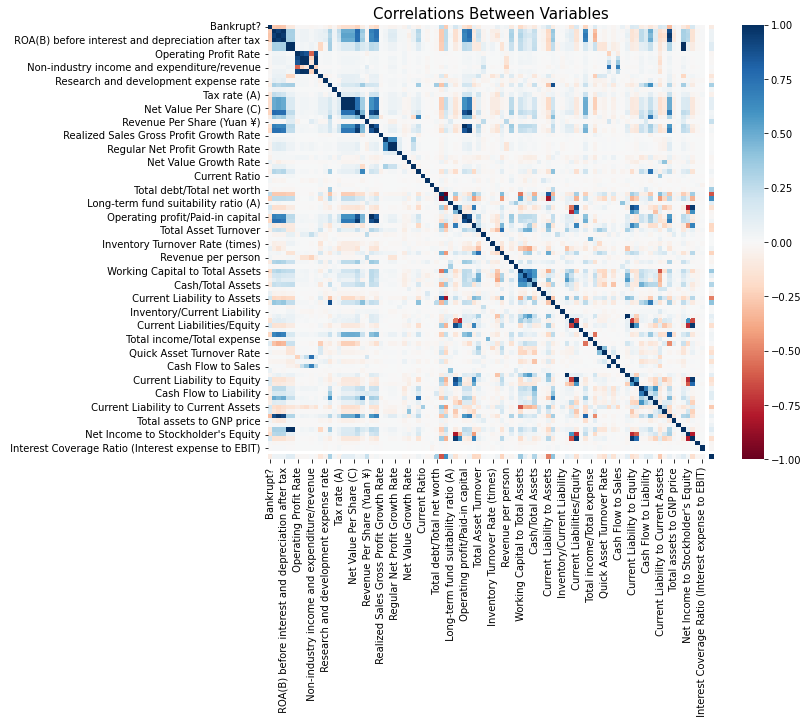

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

##Bankrupt Variable

In [13]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

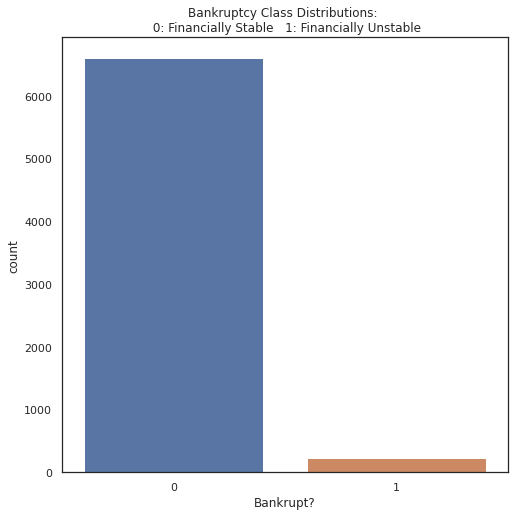

In [14]:
#visualize the data

sns.set_theme(context = 'notebook', style="white")

plt.figure(figsize = (8,8))
sns.countplot(x = 'Bankrupt?', data = df);
plt.title('Bankruptcy Class Distributions: \n 0: Financially Stable   1: Financially Unstable');

We see that this data set is skewed towards financially stable therefore if we use this to train our models, they will likely be skewed towards financially stable. 

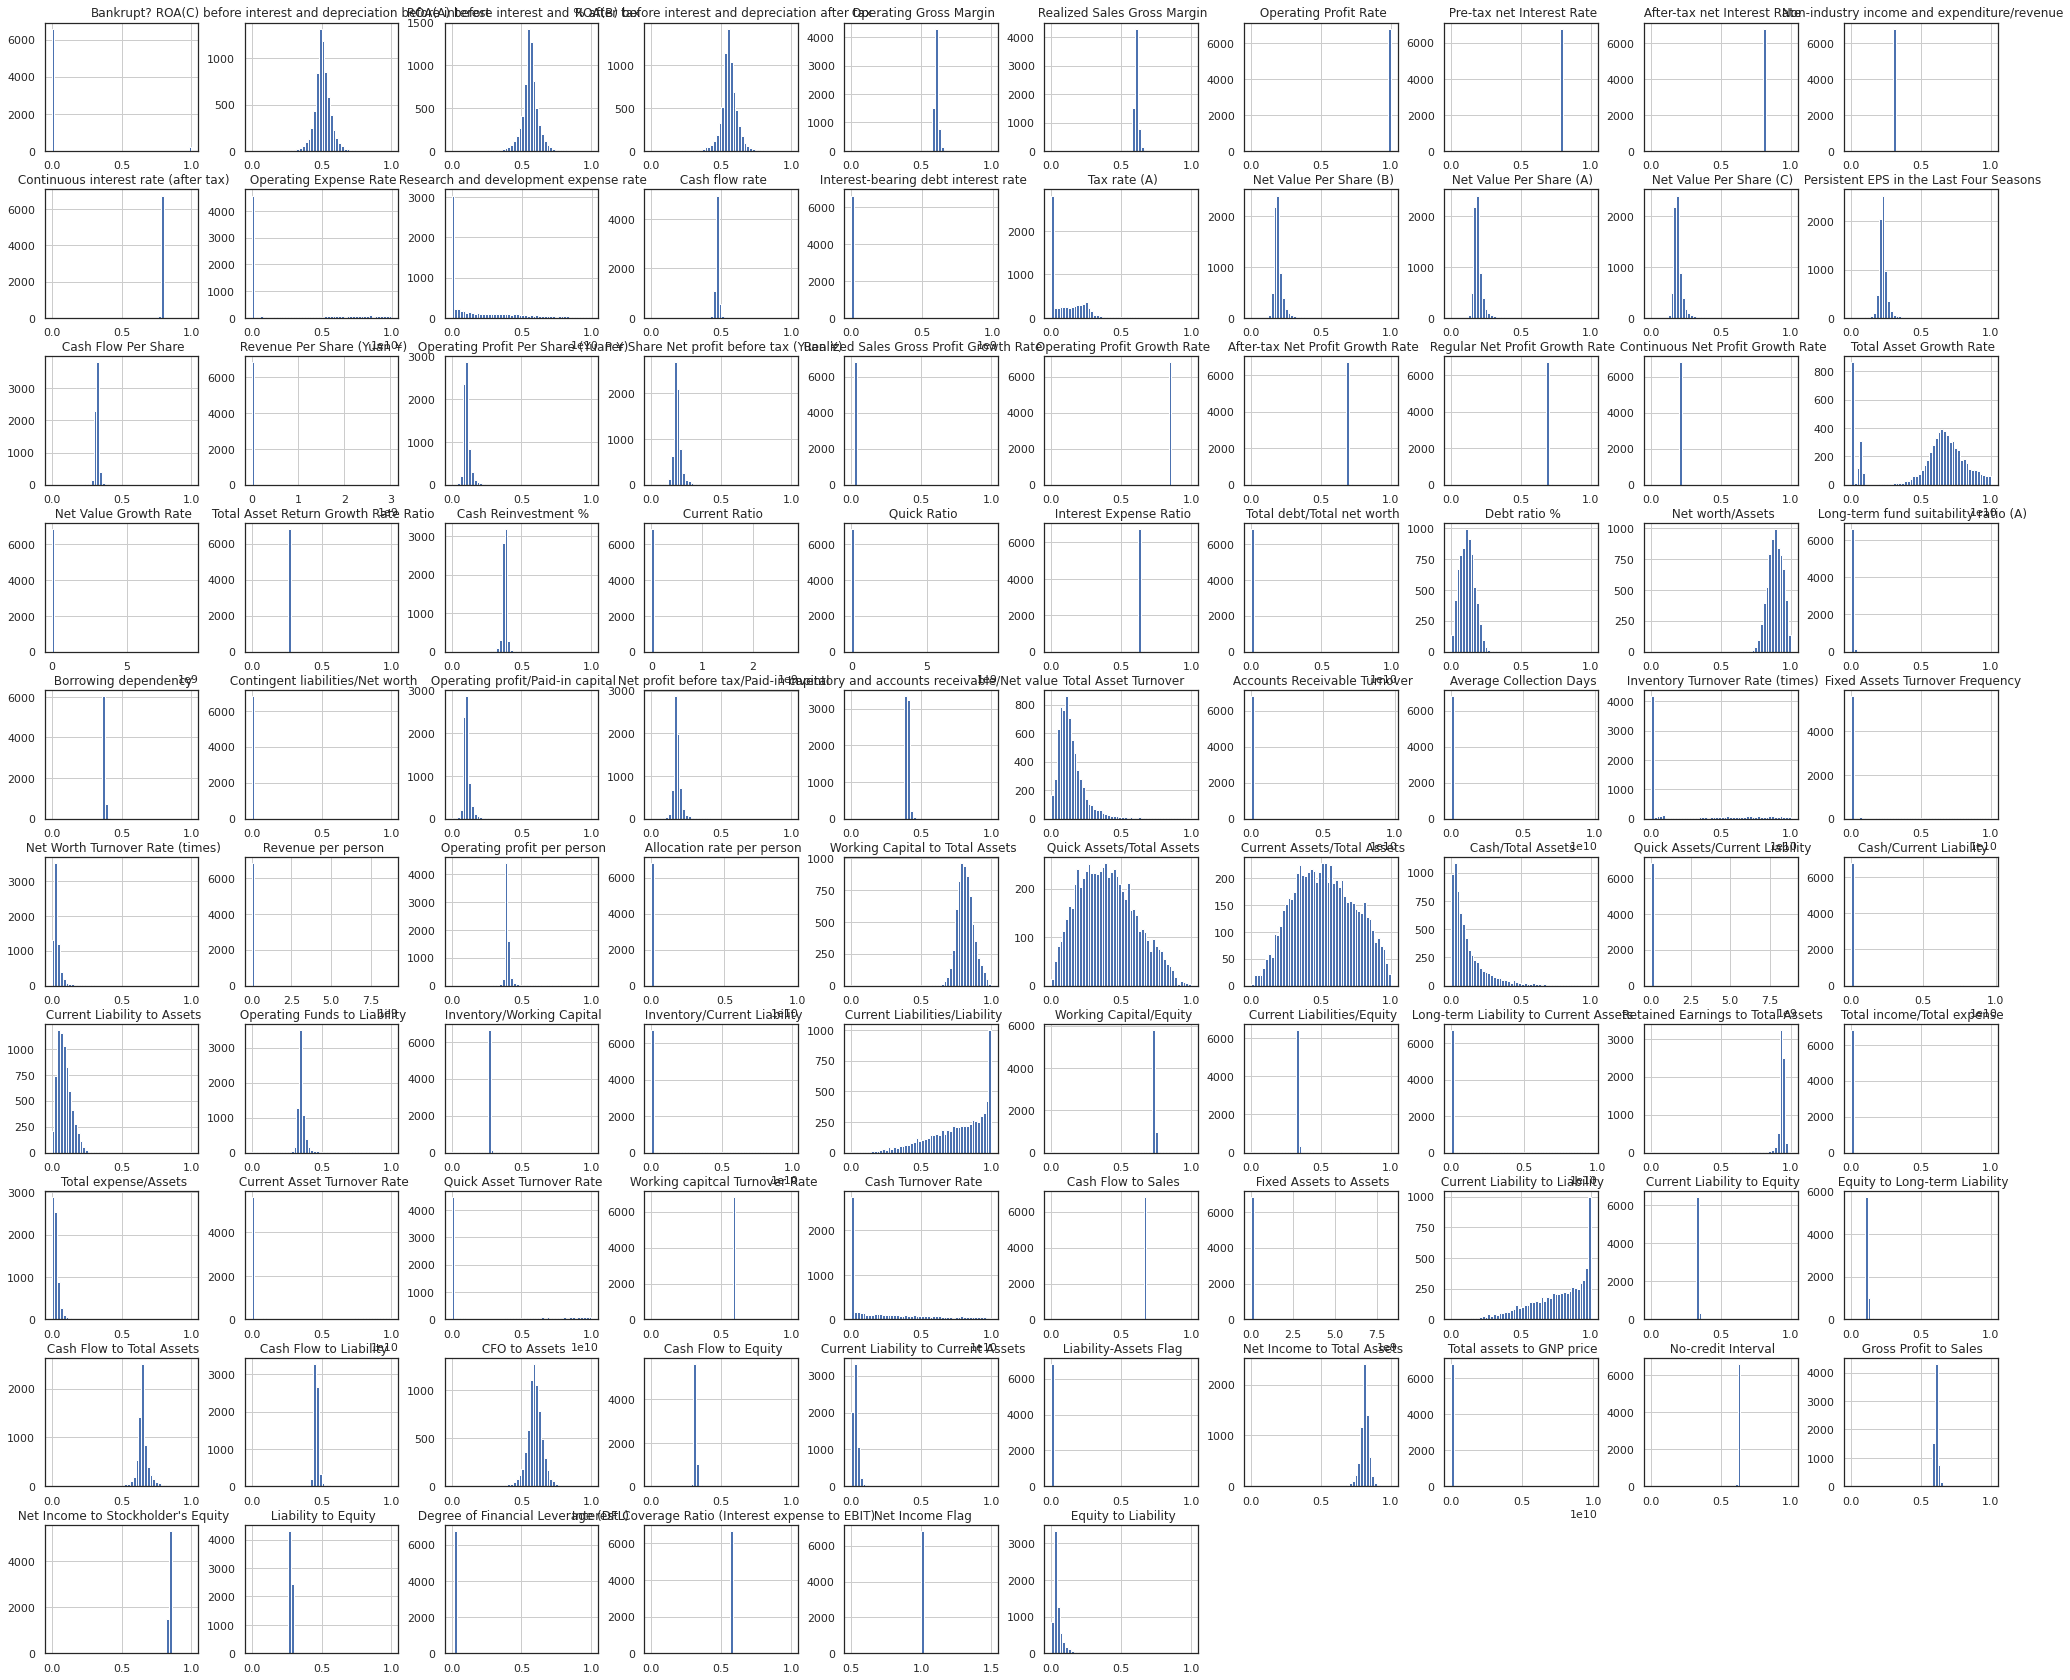

In [15]:
#numerical data
df.hist(figsize = (35,30), bins = 50)
plt.show()

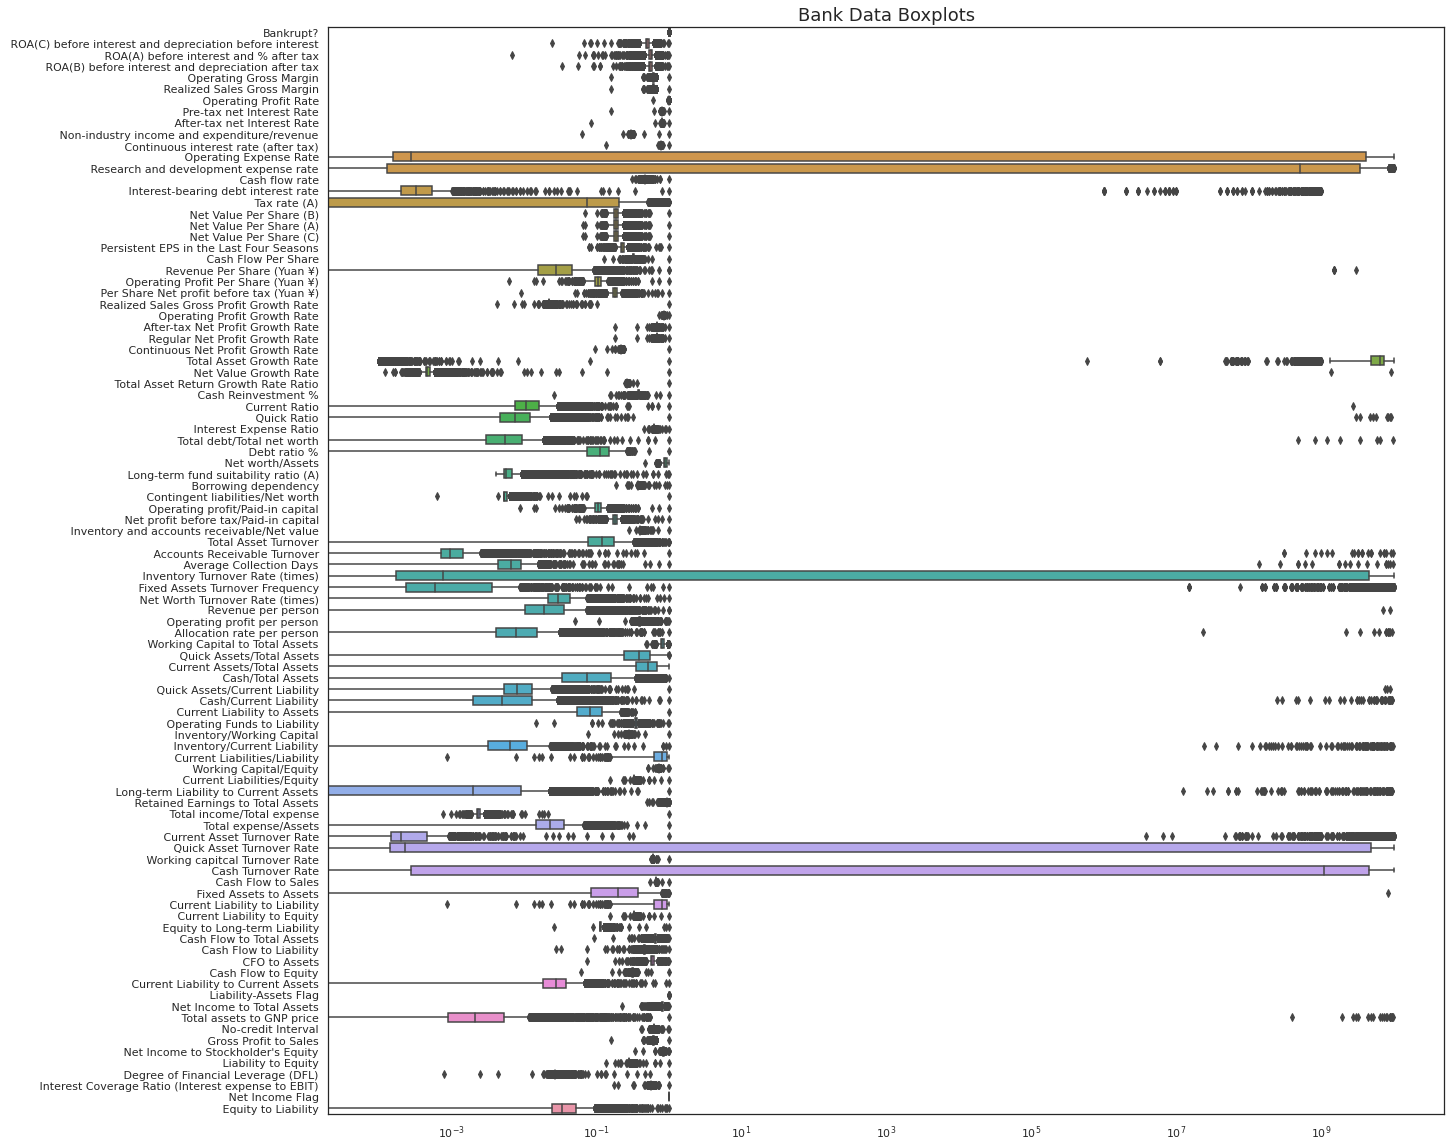

In [16]:
#plotting Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

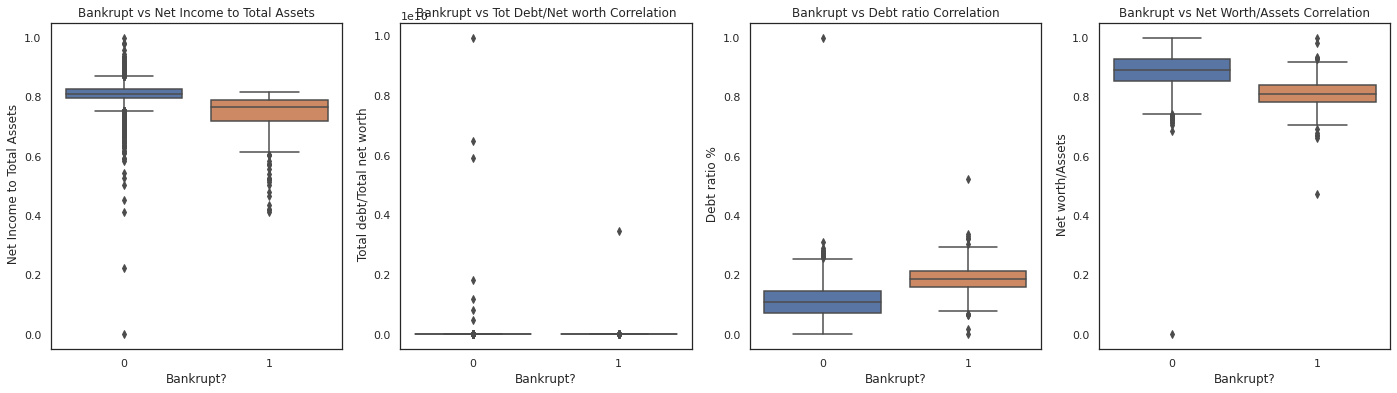

In [17]:
#plotting interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=" Total debt/Total net worth", data=df, ax=axes[1]) 
axes[1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y=" Debt ratio %", data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y=" Net worth/Assets", data=df, ax=axes[3])  
axes[3].set_title('Bankrupt vs Net Worth/Assets Correlation') 

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

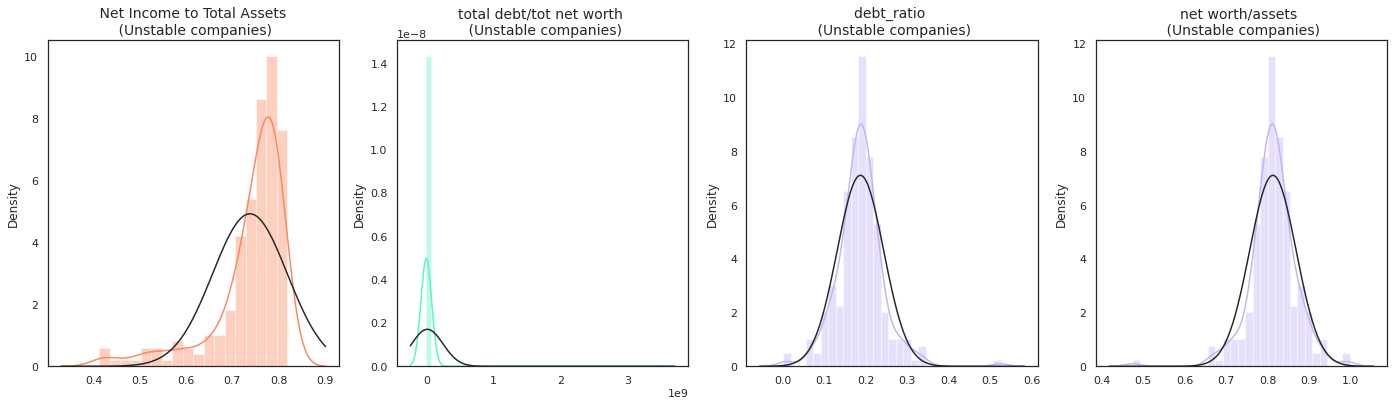

In [18]:
#plotting the feature distributions for close to bankrputcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = df[' Net Income to Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = df[' Total debt/Total net worth'].loc[df['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = df[' Debt ratio %'].loc[df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = df[' Net worth/Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

Let's remove the outliers to see if we can get a more normal distrubution. 

In [19]:
#outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    #identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))


    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in df:
    new_df = outliers_removal(df[col],str(col),df)

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
 ROA(A) before interest and % after tax Lower: 0.45512156563454
 ROA(A) before interest and % after tax Upper: 0.66957860880942
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
-------

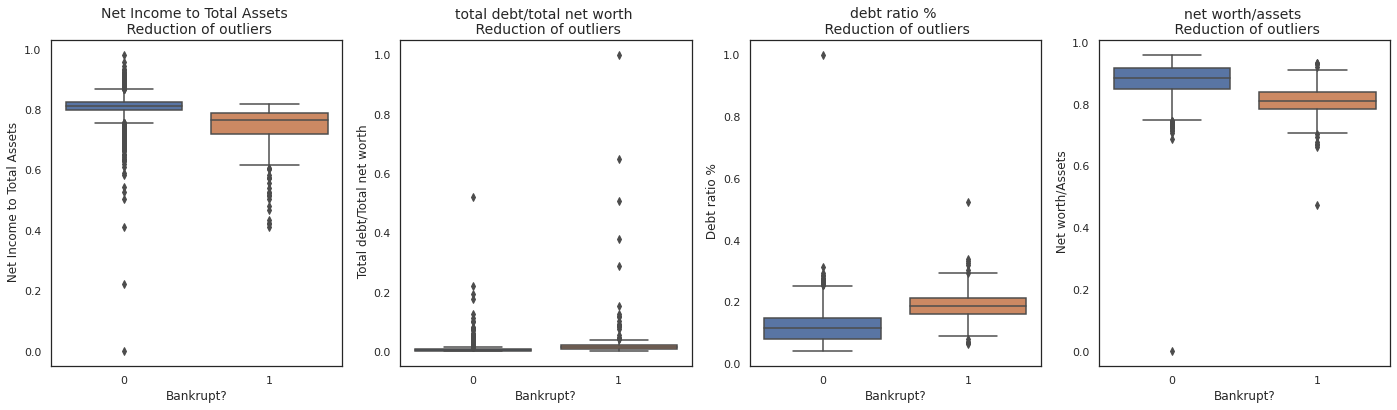

In [20]:
#check if data is cleaned up
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

sns.boxplot(x="Bankrupt?", y=" Net Income to Total Assets", data=new_df,ax=ax1) 
ax1.set_title("Net Income to Total Assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Total debt/Total net worth", data=new_df,ax=ax2) 
ax2.set_title("total debt/total net worth \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Debt ratio %", data=new_df,ax=ax3) 
ax3.set_title("debt ratio % \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Net worth/Assets', data=new_df,ax=ax4) 
ax4.set_title("net worth/assets \n Reduction of outliers", fontsize=14)
        
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

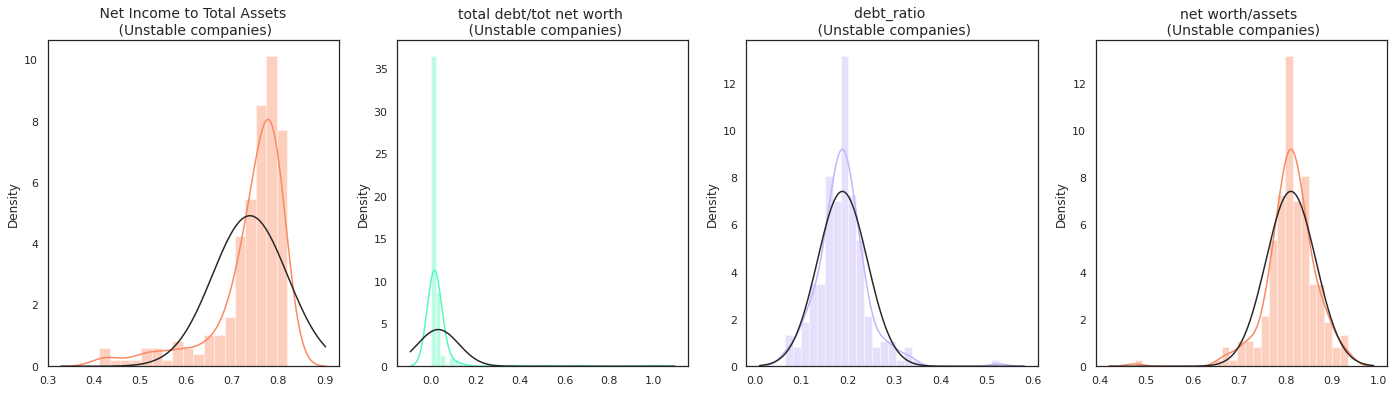

In [21]:
#feature distributions for close to bankruptcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = new_df[' Net Income to Total Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = new_df[' Total debt/Total net worth'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = new_df[' Debt ratio %'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = new_df[' Net worth/Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#FB8861')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()


Better normal bell shape with outliers removed for certain variables.

In [22]:
#defining dependent and independent variables
labels = new_df['Bankrupt?']
new_df = new_df.drop(['Bankrupt?'], axis = 1)

In [23]:

x = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

In [24]:
def log_trans(data):
    
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
            
    return data

data_norm = log_trans(new_df)

In [25]:
#splitting test and train
X_raw,X_test,y_raw,y_test  = train_test_split(data_norm, labels, test_size=0.2, stratify = labels, random_state = 42)

In [26]:
#splitting test and train
x_train, x_test, y_train, y_test  = train_test_split(data_norm, labels, test_size=0.2, stratify = labels, random_state = 42)

In [27]:
#splitting data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## SMOTE (synthetic minorty oversampling technique): IN PROGRESS


This type of preprocessing is good to use for imbalanced data like what we have.

In [28]:
# Splitting Train and Test Data

X_raw,X_test,y_raw,y_test  = train_test_split(data_norm,
                                              labels,
                                              test_size=0.1,
                                              stratify = labels,
                                              random_state = 42)

In [37]:
# Stratified Cross Validation Splitting

sss = StratifiedKFold(n_splits=5, shuffle=False)

for train_index, test_index in sss.split(X_raw,y_raw):
    
    print("Train:", train_index, "Test:", test_index)
    X_train_sm, X_val_sm = X_raw.iloc[train_index], X_raw.iloc[test_index]
    y_train_sm, y_val_sm = y_raw.iloc[train_index], y_raw.iloc[test_index]

# Check the Distribution of the labels


# Turn into an array
X_train_sm = X_train_sm.values
X_val_sm = X_val_sm.values
y_train_sm = y_train_sm.values
y_val_sm = y_val_sm.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train_sm, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_val_sm, return_counts=True)
print('-' * 84)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train_sm))
print(test_counts_label/ len(y_val_sm))

Train: [1005 1097 1131 ... 5640 5641 5642] Test: [   0    1    2 ... 1128 1129 1130]
Train: [   0    1    2 ... 5640 5641 5642] Test: [1005 1097 1131 ... 2256 2257 2258]
Train: [   0    1    2 ... 5640 5641 5642] Test: [2224 2259 2260 ... 3384 3385 3438]
Train: [   0    1    2 ... 5640 5641 5642] Test: [3386 3387 3388 ... 4512 4513 4514]
Train: [   0    1    2 ... 4512 4513 4514] Test: [4515 4516 4517 ... 5640 5641 5642]
------------------------------------------------------------------------------------
Label Distributions: 

[0.96522702 0.03477298]
[0.96542553 0.03457447]


##Models

Logistic Regression, and Support Vector Machines (SVM), Naive Bayes, Random Forest Classifier, Gradient Boosted Trees, and Extra Trees models will be used to train and test the data set with a split of 80/20 training to validation.

##Logistic Regression

Logistic regression is a form of linear model that is best for binary responses such as whether a company went bankrupt or not.

In [64]:
#training model
lr = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
lr.fit(X_train_sm,y_train_sm)

#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))

confusion matrix:
 [[603   2]
 [ 19   3]]
accuracy score =  0.9665071770334929
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       605
           1       0.60      0.14      0.22        22

    accuracy                           0.97       627
   macro avg       0.78      0.57      0.60       627
weighted avg       0.96      0.97      0.96       627



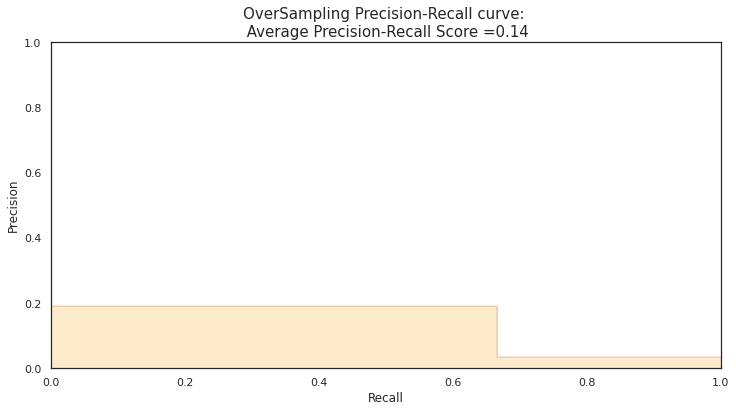

In [70]:
#plotting Precision-Recall curve

y_score_reg = best_est_reg.predict(X_val_sm)

average_precision = average_precision_score(y_val_sm, y_score_reg)

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_val_sm, y_score_reg)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=15)

plt.show()

The logistic regression model has an F1 score of 0.98 for predicting financial stable companies which indicates that the model is performing accurately with precision and recall, however it has an F1 of 0.22 for predicting whether a company will go bankrupt which is not ideal given the task at hand. 

##Support Vector Machine (SVM)

The goal of SVM is to use linear classification and select a line (vector) with a maximum margin with a goal to maximize the minimum distance to each category.


In [69]:
#training model
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(X_train_sm,y_train_sm)

#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))

confusion matrix:
 [[605   0]
 [ 22   0]]
accuracy score =  0.9649122807017544
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       605
           1       0.00      0.00      0.00        22

    accuracy                           0.96       627
   macro avg       0.48      0.50      0.49       627
weighted avg       0.93      0.96      0.95       627



The SVM model has an F1 score of 0.98 for financially stable companies but is unable to predict any unstable companies. This model must be tuned to perform better.

##Naive Bayes

Naive Bayes theorem is used to calculate probability based on prior probabilities. This model could useful for making future company bankruptcy predictions based on this dataset.

In [65]:
#training model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_sm, y_train_sm)

#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))

confusion matrix:
 [[503 102]
 [  4  18]]
accuracy score =  0.8309409888357256
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.83      0.90       605
           1       0.15      0.82      0.25        22

    accuracy                           0.83       627
   macro avg       0.57      0.82      0.58       627
weighted avg       0.96      0.83      0.88       627



Naive Bayes model has an F1 score of 0.90 for predicting financial stable companies which indicates that the model is performing accurately with precision and recall, however it has an F1 of 0.25 for predicting whether a company will go bankrupt which is not ideal given the task at hand.

## Random Forest Classifier

In [66]:
#training model
rfc = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features='auto', max_depth=None, criterion='entropy', bootstrap=False)
rfc.fit(X_train_sm, y_train_sm)

#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))

confusion matrix:
 [[603   2]
 [ 16   6]]
accuracy score =  0.9712918660287081
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       605
           1       0.75      0.27      0.40        22

    accuracy                           0.97       627
   macro avg       0.86      0.63      0.69       627
weighted avg       0.97      0.97      0.96       627



Random Forest Classifier model has an F1 score of 0.99 for predicting financial stable companies which indicates that the model is performing accurately with precision and recall, however it has an F1 of 0.40 for predicting whether a company will go bankrupt. This is not great for prediction of bankrupt companies but is performing better than the previous models.

## Gradient Boosted Trees

In [67]:
#training model
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train_sm, y_train_sm)

#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = gbc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))

confusion matrix:
 [[602   3]
 [ 15   7]]
accuracy score =  0.9712918660287081
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       605
           1       0.70      0.32      0.44        22

    accuracy                           0.97       627
   macro avg       0.84      0.66      0.71       627
weighted avg       0.97      0.97      0.97       627



Gradient Boosted Trees model has an F1 score of 0.99 for predicting financial stable companies which indicates that the model is performing accurately with precision and recall, however it has an F1 of 0.44 for predicting whether a company will go bankrupt. This is not great for prediction of bankrupt companies but is the best of all models.

## Extra Trees

In [68]:
#training model
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X_train_sm, y_train_sm)

#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = et.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))

confusion matrix:
 [[602   3]
 [ 19   3]]
accuracy score =  0.9649122807017544
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       605
           1       0.50      0.14      0.21        22

    accuracy                           0.96       627
   macro avg       0.73      0.57      0.60       627
weighted avg       0.95      0.96      0.96       627



Extra Trees model has an F1 score of 0.98 for predicting financial stable companies which indicates that the model is performing accurately with precision and recall, however it has an F1 of 0.21 for predicting whether a company will go bankrupt which is not ideal given the task at hand.

# Conclusion


After careful consideration of the EDA, pre-processing, and cleaning of the data, the data were tested using the ML models  Logistic Regression, and Support Vector Machines (SVM), Naive Bayes, Random Forest Classifier, Gradient Boosted Trees, and Extra Trees models. The data was split into 80/20 training/test sets. The Gradient Boosted Trees performed the best yeilding an overall accuracy of 97% and 0.99 F1 score for predicting financially stable companies.Although the model's F1 for prediction of financially unstable companies is 0.44, that is the highest of all the tried models in this project. I would move forward using this model the most for predicting a company's financial status. 